## Project Description:

#### Required Tasks
- Explore each data set using different descriptive and plotting methods. 
- Explore each dataset, check for missing data, and apply proper data imputation methods. 
- Apply the same preprocessing techniques on the classification_test and regression_test. Note that these two datasets don't have target columns. 
- Scale each dataset. Explain your choice of data scaling method. 
- Apply clustering methods discussed in class to study the structure of each dataset. Discuss how the outcome of clustering will help you better understand the structure of data. Provide result interpretation for each clustering model. 
- Classification dataset: Apply all the classification models you have learned in this course. Discuss the results and outcomes. Discuss the choice of evaluation method and how it helps you find the best values of the model hyperparameters. 
- Find the best classification model among the list of models trained on the classification_train dataset. Use this model to predict the target values of the classification_test. 


#### Deliverable
Submit ONLY the iPython notebook(s) or the .py file(s) of your work. Use the following frame for your submission. Please don't remove the headers in the following structure. 

Make sure to list the name and student id of all the group members in your iPython notebook file. 

#### Rubric
| Descriptio | Fair | Good | excellent |
|:-----------|:------|:------|:----------|
|Preprocessing|Demonstrate limited understanding of preprocessing steps | Demonstrate a moderate ability to find a way to apply the preprocessing step to prepare the dataset for Machine learning models | Demonstrate the ability to choose the appropriate preprocessing model to prepare the dataset |
|learning model | Demonstrate limited understanding of methods used to train learning models | Demonstrate the ability to understand techniques used to train learning models with some effectiveness. This includes optimization algorithms, initialization, regularization, and hyperparameter search methods | Demonstrate ability to understand and apply various algorithms as well as initialization, regularization, and hyperparameter search methods |
|Final prediction |Demonstrate limited understanding of strategies to structure and end to end machine learning project | Demonstrate ability to understand classic ML strategies such as error analysis, data split, data collection and evaluation metric selection with some effectiveness | Demonstrates ability to structure the project and apply methods such as error analysis, data split, data collection, design a labeling process and select proper evaluation metrics to improve performance.

# Classification

### Data preparation

In [230]:
#Importing the necessary Libraries 

# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical operations
import numpy as np

# Importing matplotlib for basic plotting
import matplotlib.pyplot as plt

# Importing seaborn for statistical data visualization
import seaborn as sns


#### Train

We have loaded the training dataset from a CSV file (Classification_train.csv) into a pandas DataFrame named as df_classification_train.

In [231]:
# load training dataset
df_classification_train = pd.read_csv('Classification_train.csv')
df_classification_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1794 non-null   object 
 1   Age                             1794 non-null   float64
 2   Height                          1794 non-null   float64
 3   Weight                          1613 non-null   float64
 4   family_history_with_overweight  1576 non-null   object 
 5   FAVC                            1605 non-null   object 
 6   FCVC                            1794 non-null   float64
 7   NCP                             1627 non-null   float64
 8   CAEC                            1794 non-null   object 
 9   SMOKE                           1622 non-null   object 
 10  CH2O                            1794 non-null   float64
 11  SCC                             1603 non-null   object 
 12  FAF                             17

Splitting df_classification_train into feature and target sets

X contains the features (independent variables) for the classification task. It is created by dropping the 'y' column (target variable) from df_classification_train.

y contains the target variable (dependent variable) for the classification task. It is created by selecting only the 'y' column from df_classification_train.


In [232]:
# split df_classification_train into feature and target set
X = df_classification_train.drop('y', axis = 1)
y = df_classification_train['y']

We are assessing the structure of the dataset to understand the data types.

In [233]:
# X info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1794 non-null   object 
 1   Age                             1794 non-null   float64
 2   Height                          1794 non-null   float64
 3   Weight                          1613 non-null   float64
 4   family_history_with_overweight  1576 non-null   object 
 5   FAVC                            1605 non-null   object 
 6   FCVC                            1794 non-null   float64
 7   NCP                             1627 non-null   float64
 8   CAEC                            1794 non-null   object 
 9   SMOKE                           1622 non-null   object 
 10  CH2O                            1794 non-null   float64
 11  SCC                             1603 non-null   object 
 12  FAF                             17

In [234]:
# Check for null in the feature dataset - train
X.isnull().sum()

Gender                              0
Age                                 0
Height                              0
Weight                            181
family_history_with_overweight    218
FAVC                              189
FCVC                                0
NCP                               167
CAEC                                0
SMOKE                             172
CH2O                                0
SCC                               191
FAF                                 0
TUE                               172
CALC                              210
MTRANS                            183
dtype: int64

#### Test
Loading the testing dataset from a CSV file (Classification_test.csv) into a pandas DataFrame named df_classification_test.

In [235]:
# load testing dataset
df_classification_test = pd.read_csv('Classification_test.csv')
df_classification_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          302 non-null    object 
 1   Age                             317 non-null    float64
 2   Height                          297 non-null    float64
 3   Weight                          303 non-null    float64
 4   family_history_with_overweight  307 non-null    object 
 5   FAVC                            317 non-null    object 
 6   FCVC                            317 non-null    float64
 7   NCP                             303 non-null    float64
 8   CAEC                            317 non-null    object 
 9   SMOKE                           298 non-null    object 
 10  CH2O                            317 non-null    float64
 11  SCC                             300 non-null    object 
 12  FAF                             304 

In [236]:
#finding the null values in the test dataframe
df_classification_test.isnull().sum()

Gender                            15
Age                                0
Height                            20
Weight                            14
family_history_with_overweight    10
FAVC                               0
FCVC                               0
NCP                               14
CAEC                               0
SMOKE                             19
CH2O                               0
SCC                               17
FAF                               13
TUE                               16
CALC                              23
MTRANS                            18
dtype: int64

Cleaning train and test feature set column by column. Train feature set is labelled X while test feature set is lablled df_classification_test.

#### Gender Column

##### Train

In [237]:
# The individual's gender
X['Gender'].value_counts()

Gender
Male      929
Female    865
Name: count, dtype: int64

In [238]:
#Checking the null values in Gender Column 
X['Gender'].isna().sum()

0

There are no null values in the Column Gender of Train dataset.

We are using the map function to replace values in the 'Gender' column according to the provided dictionary. We have assigned 1 to 'Male' and 0 to 'Female' as the most repeated gender it female. After using the map function, the 'Gender' column will be transformed to numerical values based on the specified mapping values.

In [239]:
# Map the 'Gender' column to numerical values, where 'Male' is represented as 1 and 'Female' as 0
X['Gender'] = X['Gender'].map({'Male': 1, 'Female': 0})

# Display information about the updated 'Gender' column
X['Gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1794 entries, 0 to 1793
Series name: Gender
Non-Null Count  Dtype
--------------  -----
1794 non-null   int64
dtypes: int64(1)
memory usage: 14.1 KB


In [240]:
# check X after mapping
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,18.000000,1.790000,52.000000,no,no,3.000000,3.000000,Sometimes,no,2.000000,no,1.000000,1.000000,NaN,NaN
1,1,17.000000,1.700000,70.000000,yes,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,2.000000,Sometimes,Walking
2,1,17.000000,1.790000,57.000000,yes,yes,2.000000,4.000000,Frequently,no,2.000000,NaN,2.000000,1.000000,no,Public_Transportation
3,1,24.829290,1.755967,112.256165,yes,yes,1.369529,3.000000,Sometimes,no,2.000000,no,1.596576,0.002600,Sometimes,Public_Transportation
4,1,25.000000,1.780000,NaN,yes,NaN,2.000000,3.000000,Sometimes,no,3.000000,NaN,3.000000,2.000000,no,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1,19.671876,1.699474,78.000000,yes,no,1.925064,2.358298,Sometimes,no,2.774043,no,0.000000,0.133566,no,NaN
1790,1,30.554956,1.779136,120.600940,yes,yes,2.671238,3.000000,Sometimes,no,2.145368,no,0.882709,0.593917,Sometimes,Automobile
1791,1,21.000000,1.620000,70.000000,no,yes,2.000000,1.000000,no,no,3.000000,no,1.000000,0.000000,Sometimes,NaN
1792,0,29.320380,1.642506,69.906708,yes,NaN,2.366949,3.000000,Sometimes,no,1.926577,no,1.581242,0.000000,Sometimes,Automobile


##### Test

In [241]:
# The individual's gender in test dataset
df_classification_test['Gender'].value_counts()

Gender
Female    169
Male      133
Name: count, dtype: int64

In [242]:
#Checking the null values in Gender Column 
df_classification_test['Gender'].isna().sum()


15

Since we have 15 null values in the Gender column of the test dataset, we replace it with the most frequent class which is 'Female'.

In [243]:
# return gender mode
gender_mode = df_classification_test['Gender'].mode()[0]
gender_mode

# fill NAs with mode
df_classification_test['Gender'] = df_classification_test['Gender'].fillna(gender_mode)

Following what was done with train dataset, we map Male' as 1 and 'Female' as 0

In [244]:
# convert the values in the 'Gender' column to binary numerical values
df_classification_test['Gender'] = df_classification_test['Gender'].map({'Male': 1, 'Female': 0})

# Display information about the updated 'Gender' column
df_classification_test['Gender'].value_counts()

Gender
0    184
1    133
Name: count, dtype: int64

#### Height column

##### Train

In [245]:
#Checking the value count in the Column Height 
X['Height'].value_counts()

Height
1.700000    52
1.650000    43
1.620000    33
1.600000    33
1.750000    30
            ..
1.760175     1
1.735851     1
1.849507     1
1.618573     1
1.774775     1
Name: count, Length: 1347, dtype: int64

In [246]:
#Checking the null values in the Column Height
X['Height'].isna().sum()

0

There are no null values in the Column Height in the train dataset and it is already in numerical datatype. No cleaning is required.

##### Test

In [247]:
#Checking the value count in the Column Height 
df_classification_test['Height'].value_counts()

Height
1.600000    10
1.750000     8
1.700000     8
1.650000     6
1.630000     5
            ..
1.709585     1
1.748106     1
1.683000     1
1.704141     1
1.771043     1
Name: count, Length: 244, dtype: int64

In [248]:
#Checking the null values in the Column Height
df_classification_test['Height'].isna().sum()

20

There are 20 null values in the height column of the test dataset. To check the appropriate imputation statistics, we plot the KDE.

c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


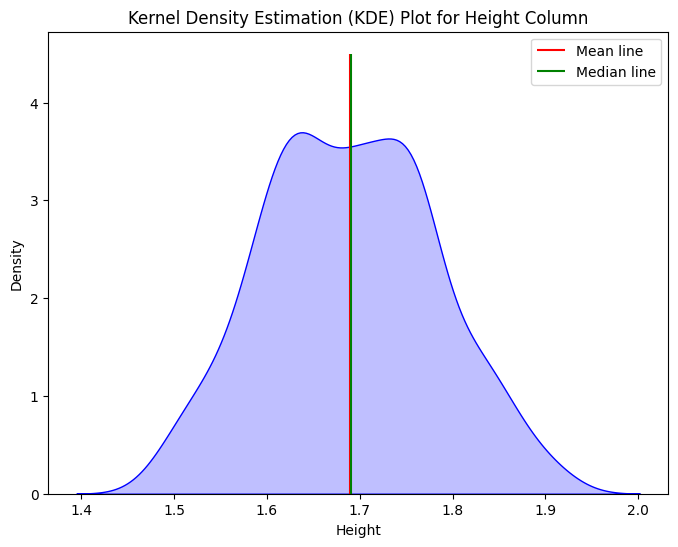

In [249]:
# Create KDE plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_classification_test['Height'], fill=True, color='blue')

plt.vlines(df_classification_test['Height'].mean(), ymin = 0, ymax = 4.5, color = 'r', label = 'Mean line')
plt.vlines(df_classification_test['Height'].median(), ymin = 0, ymax = 4.5, color = 'g', label = 'Median line')

plt.title('Kernel Density Estimation (KDE) Plot for Height Column')
plt.xlabel('Height')
plt.ylabel('Density')
plt.legend()
plt.show()

Since the height is showing normal distribution we replace null value with the mean.

In [250]:
# replace null value with mean
df_classification_test['Height'].fillna(df_classification_test['Height'].mean() ,inplace = True)
df_classification_test['Height']

0      1.910672
1      1.670000
2      1.773656
3      1.745602
4      1.746652
         ...   
312    1.709731
313    1.717460
314    1.689023
315    1.773181
316    1.771043
Name: Height, Length: 317, dtype: float64

#### Weight column

##### Train

In [251]:
#Checking the value count in the Weight Column 
X['Weight'].value_counts()

Weight
80.000000     46
70.000000     36
50.000000     34
60.000000     32
75.000000     29
              ..
142.102468     1
44.753943      1
112.835195     1
103.586342     1
117.398976     1
Name: count, Length: 1178, dtype: int64

In [252]:
#Checking the null values in the Column Height 
X['Weight'].isna().sum()

181

There are 181 null values in the Weight column of the train dataset. To check the appropriate imputation statistics, we plot the KDE.

c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


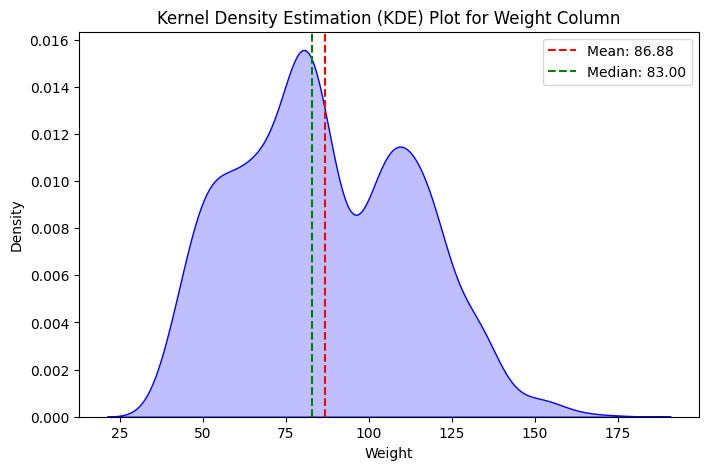

In [253]:
# Plotting the KDE plot using Seaborn
plt.figure(figsize=(8, 5))  # Set the figure size

# Creating the KDE plot for the 'weight' column
sns.kdeplot(X['Weight'], fill=True, color="blue")

# Get the mean and median
mean_value = X['Weight'].mean()
median_value = X['Weight'].median()

# Display mean and median lines on the plot
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')

# Set plot labels, title, and show legend
plt.xlabel('Weight')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot for Weight Column')
plt.legend()

# Show the KDE plot with mean and median lines
plt.show()

As the plot is right-skewed we will replace the null values with the median which is 83.00.

In [254]:
# Handle null values by filling them with the column's median
X['Weight'].fillna(X['Weight'].median(), inplace=True)

##### Test

In [255]:
#Checking the value count in the Weight Column 
df_classification_test['Weight'].value_counts()

Weight
80.000000     8
50.000000     7
45.000000     6
90.000000     5
70.000000     5
             ..
78.790936     1
112.098616    1
62.269912     1
41.706283     1
137.044959    1
Name: count, Length: 244, dtype: int64

In [256]:
#Checking the null values in the Column Height 
df_classification_test['Weight'].isna().sum()

14

There are 14 null values in the Weight column of the test dataset. To check the appropriate imputation statistics, we plot the KDE.

c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


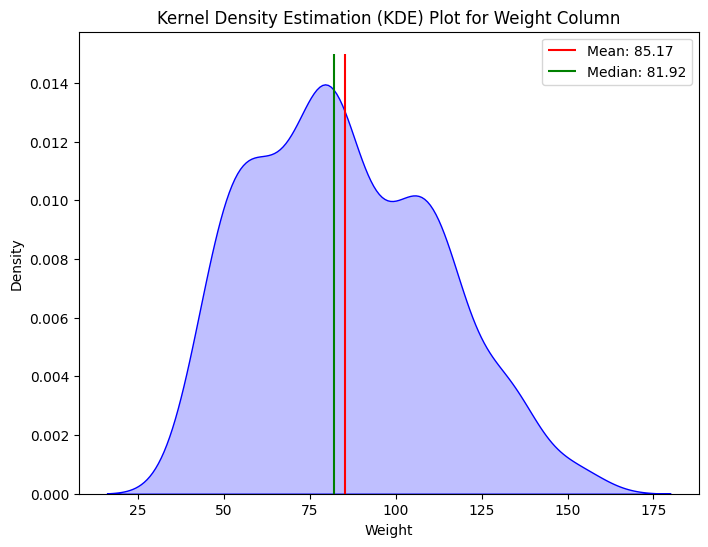

In [257]:
# Create KDE plot for the 'Weight' column in test dataset
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_classification_test['Weight'], fill=True, color='blue')

# Get the mean and median
mean_value_test = df_classification_test['Weight'].mean()
median_value_test = df_classification_test['Weight'].median()

plt.vlines(df_classification_test['Weight'].mean(), ymin = 0, ymax = 0.015, color = 'r', label=f'Mean: {mean_value_test:.2f}')
plt.vlines(df_classification_test['Weight'].median(), ymin = 0, ymax = 0.015, color = 'g', label = f'Median: {median_value_test:.2f}')

plt.title('Kernel Density Estimation (KDE) Plot for Weight Column')
plt.xlabel('Weight')
plt.ylabel('Density')
plt.legend()
plt.show()

The KDE plot shows a skewed distribution, we need to replace missing values with the median for the Weight column in test dataset

In [258]:
# Replacing missing values with the median for the 'Weight' column
median_weight = df_classification_test['Weight'].median()
df_classification_test['Weight'].fillna(median_weight, inplace=True)
df_classification_test['Weight']

0      129.232708
1       91.000000
2       87.070234
3      133.554686
4      133.800129
          ...    
312     95.032177
313     51.491957
314    102.872802
315    112.348722
316    137.044959
Name: Weight, Length: 317, dtype: float64

#### Family History with Overweight Column

##### Train

In [259]:
# Display the count of unique values in the 'family_history_with_overweight' column
X['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    1284
no      292
Name: count, dtype: int64

In [260]:
#number of null values in this column:
sum(X['family_history_with_overweight'].isna())

218

We have replaced the null values in this categorical column(family_history_with_overweight) with the most frequent category  using (mode).

In [261]:
#Replace the null values in this categorical column with the most frequent category (mode), in this case, 'yes'.
X['family_history_with_overweight'].fillna(X['family_history_with_overweight'].mode()[0], inplace=True)
X['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    1502
no      292
Name: count, dtype: int64

We are using the map function to replace values in the 'family_history_with_overweight' column according to the provided dictionary. We have assigned  numerical values to the column  numerical values where 'yes', being the predominant class, is represented as 1 and 'no' as 0.

In [262]:
# Map the 'family_history_with_overweight' column to numerical values, where 'yes' is represented as 1 and 'no' as 0
X['family_history_with_overweight'] = X['family_history_with_overweight'].map({'yes': 1, 'no': 0})

# Display information about the updated 'family_history_with_overweight' column after mapping
X['family_history_with_overweight']

0       0
1       1
2       1
3       1
4       1
       ..
1789    1
1790    1
1791    0
1792    1
1793    1
Name: family_history_with_overweight, Length: 1794, dtype: int64

##### Test

In [263]:
#Checking the value count of the column family_history_with_overweight
df_classification_test['family_history_with_overweight'].value_counts()

family_history_with_overweight
yes    249
no      58
Name: count, dtype: int64

In [264]:
#number of null values in this column:
sum(df_classification_test['family_history_with_overweight'].isna())

10

In [265]:
# Impute missing values in the 'family_history_with_overweight' column with the mode value in test dataset
family_history_with_overweight = df_classification_test['family_history_with_overweight'].mode()[0]
df_classification_test['family_history_with_overweight'].fillna(family_history_with_overweight, inplace=True)

Mapping the 'family_history_with_overweight' columns to numerical values, where 'yes' is represented as 1 and 'no' as 0

In [266]:
df_classification_test['family_history_with_overweight'] = df_classification_test['family_history_with_overweight'].map({'yes': 1, 'no': 0})

# Display the count of unique values in the updated 'family_history_with_overweight' column
df_classification_test['family_history_with_overweight'].value_counts()

family_history_with_overweight
1    259
0     58
Name: count, dtype: int64

#### Frequency of consuming High-Caloric Foods Column

##### Train

In [267]:
#Frequency of consuming high-caloric foods
X['FAVC'].value_counts()

#188 null values

FAVC
yes    1417
no      188
Name: count, dtype: int64

In [268]:
#Checking the null values in the column Frequency of consuming high-caloric foods 'FAVC'.
X['FAVC'].isna().sum()

189

Replace the null values in this categorical column with the most frequent category (mode), in this case, 'yes'.

In [269]:
X['FAVC'].fillna(X['FAVC'].mode()[0], inplace=True)

# Display information about the updated 'FAVC' column
X['FAVC'].value_counts()

FAVC
yes    1606
no      188
Name: count, dtype: int64

In [270]:
# Map the 'FAVC' column to numerical values, where 'yes' is represented as 1 and 'no' as 0
X['FAVC'] = X['FAVC'].map({'yes': 1, 'no': 0})

# Display information about the updated 'FAVC' column after mapping
X['FAVC'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1794 entries, 0 to 1793
Series name: FAVC
Non-Null Count  Dtype
--------------  -----
1794 non-null   int64
dtypes: int64(1)
memory usage: 14.1 KB


##### Test

In [271]:
#FAVC: Frequency of consuming high-caloric foods
df_classification_test['FAVC'].value_counts()

FAVC
yes    279
no      38
Name: count, dtype: int64

In [272]:
#Checking the null values in the column Frequency of consuming high-caloric foods 'FAVC'.
df_classification_test['FAVC'].isna().sum()

0

We don't have any null values in the column Frequency of consuming high-caloric foods 'FAVC' in the test dataset

In [273]:
#Map the 'FAVC' column to numerical values: 'yes': 1, 'no: 0
df_classification_test['FAVC'] = df_classification_test['FAVC'].map({'no': 0, 'yes': 1})

# Display the count of unique values in the updated 'FAVC' column
df_classification_test['FAVC'].value_counts()

FAVC
1    279
0     38
Name: count, dtype: int64

#### Number of Meals Per Day Column

##### Train

In [274]:
#Checking the frequency of the column Number of meals per day 'NCP'.
X['NCP'].value_counts()

NCP
3.000000    916
1.000000    167
4.000000     56
1.737620      2
3.559841      2
           ... 
2.975362      1
2.857787      1
2.976211      1
3.169089      1
2.993634      1
Name: count, Length: 487, dtype: int64

In [275]:
#Checking the null values in the column Number of meals per day 'NCP'.
X['NCP'].isna().sum()

167

There are 167 null values in the NCP column of the train dataset. To check the appropriate imputation statistics, we plot the KDE.

c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


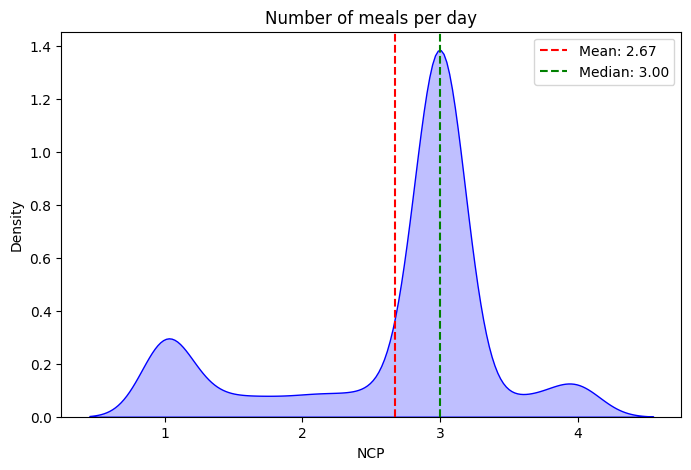

In [276]:
# Plotting the KDE plot using Seaborn
plt.figure(figsize=(8, 5))  # Set the figure size

# Creating the KDE plot for the 'weight' column
sns.kdeplot(X['NCP'], fill = True, color="blue")

# Get the mean and median
mean_value = X['NCP'].mean()
median_value = X['NCP'].median()

# Display mean and median lines on the plot
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')

# Set plot labels, title, and show legend
plt.title('Number of meals per day')
plt.legend()

# Show the KDE plot with mean and median lines
plt.show()

The KDE plot shows a skewed distribution, we need to replace missing values with the median which is 3.0 for the Number of Meals Per Day Column(NCP) in train dataset

In [277]:
# Handle null values by filling them with the column's median
X['NCP'].fillna(X['NCP'].median(), inplace=True)

##### Test

In [278]:
#Checking the frequncy of the column Number of meals per day 'NCP' in test dataset

df_classification_test['NCP'].value_counts()

NCP
3.000000    177
1.000000     23
4.000000      9
2.644692      2
1.894384      2
           ... 
2.475228      1
2.092179      1
1.101404      1
3.985442      1
1.097490      1
Name: count, Length: 95, dtype: int64

In [279]:
#Checking the null values in the column Number of meals per day 'NCP' in test dataset

df_classification_test['NCP'].isna().sum()

14

There are 14 null values in the NCP column of the test dataset. To check the appropriate imputation statistics, we plot the KDE.

c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


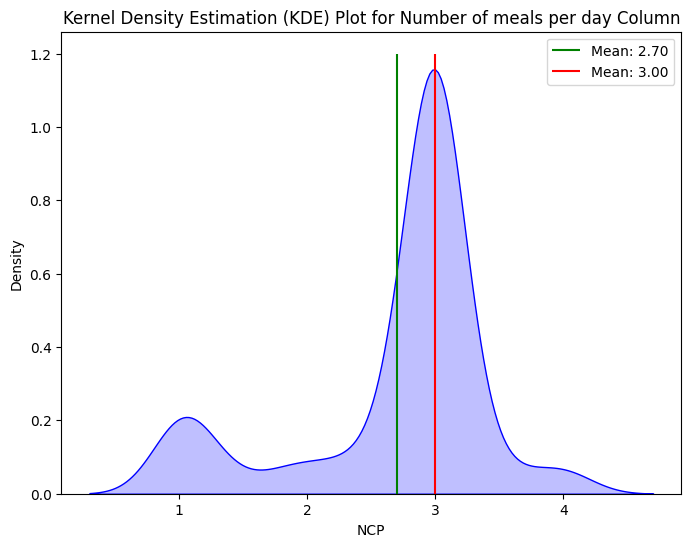

In [280]:
# Create KDE plot for the 'NCP' column
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_classification_test['NCP'], fill=True, color='blue')

# Get the mean and median
mean_value_test = df_classification_test['NCP'].mean()
median_value_test = df_classification_test['NCP'].median()

plt.vlines(df_classification_test['NCP'].mean(),ymin = 0, ymax = 1.2, color = 'g', label=f'Mean: {mean_value_test:.2f}')
plt.vlines(df_classification_test['NCP'].median(),ymin = 0, ymax = 1.2,color = 'r', label=f'Mean: {median_value_test:.2f}')
plt.title('Kernel Density Estimation (KDE) Plot for Number of meals per day Column')
plt.xlabel('NCP')
plt.ylabel('Density')
plt.legend()
plt.show()

The KDE plot shows a skewed distribution, replace missing values with the median for the column NCP

In [281]:
#Replacing the missing values with the median for the column NCP
median_weight = df_classification_test['NCP'].median()
df_classification_test['NCP'].fillna(median_weight, inplace=True)
df_classification_test['NCP']

0      3.000000
1      3.000000
2      3.618722
3      3.000000
4      3.000000
         ...   
312    2.973476
313    3.000000
314    1.097490
315    3.000000
316    3.000000
Name: NCP, Length: 317, dtype: float64

#### Number of Snacks Between Meals column

##### Train

In [282]:
#Checking the frequency of the Column Number of snacks between meals 'CAEC'.
X['CAEC'].value_counts()

CAEC
Sometimes     1498
Frequently     209
no              45
Always          42
Name: count, dtype: int64

In [283]:
#Checking the null values in the Column Number of snacks between meals 'CAEC'.
X['CAEC'].isna().sum()

0

We don't have any null values in the Column Number of snacks between meals 'CAEC' in train dataset.

Mapping the 'CAEC' column to numerical values where 'no' = 0, 'Sometimes' = 1, 'Frequenty' = 2 and 'Always' = 3 

In [284]:
# Map the 'CAEC' column to numerical values using the np.where function
X['CAEC'] = np.where(X['CAEC'] == 'no', 0, np.where(X['CAEC'] == 'Sometimes', 1, np.where(X['CAEC'] == 'Frequently', 2, 3)))

In [285]:
# Display the count of unique values in the updated 'CAEC' column
X['CAEC'].value_counts()

CAEC
1    1498
2     209
0      45
3      42
Name: count, dtype: int64

##### Test

In [286]:
# Display the count of unique values in the 'CAEC' column of the DataFrame df_classification_test
df_classification_test['CAEC'].value_counts()

CAEC
Sometimes     267
Frequently     33
Always         11
no              6
Name: count, dtype: int64

In [287]:
#Checking the null values in the Column Number of snacks between meals 'CAEC'.
df_classification_test['CAEC'].isna().sum()

0

We don't have any null values in the Column Number of snacks between meals 'CAEC' in test dataset.

Mapping the 'CAEC' column in the test dataset to numerical values where'no' is mapped to 0, 'Sometimes' to 1, 'Frequently' to 2, and 'Always' to 3.

In [288]:
# Mapping the column CAEC where 'no' is mapped to 0, 'Sometimes' to 1, 'Frequently' to 2, and 'Always' to 3
df_classification_test['CAEC'] = df_classification_test['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

In [289]:
# Display the count of unique values in the updated 'CAEC' column
df_classification_test['CAEC'].value_counts()

CAEC
1    267
2     33
3     11
0      6
Name: count, dtype: int64

#### Smoking Habits Column

##### Train

In [290]:
#Checking the Frequency of the column Smoking habits 'SMOKE'
X['SMOKE'].value_counts()

SMOKE
no     1594
yes      28
Name: count, dtype: int64

In [291]:
X['SMOKE'].isna().sum()

172

In [292]:
# Replace the null values in this categorical column with the most frequent category (mode), in this case, 'NO'.
X['SMOKE'].fillna(X['SMOKE'].mode()[0], inplace=True)
X['SMOKE'].value_counts()

SMOKE
no     1766
yes      28
Name: count, dtype: int64

Mapping the 'SMOKE' column to numerical values, where 'no' is represented as 1 and 'yes' as 0

In [293]:
# Map the 'SMOKE' column to numerical values, where 'no' is represented as 1 and 'yes' as 0 as 'no' is the most frequent class
X['SMOKE'] = X['SMOKE'].map({'no': 1, 'yes': 0})

In [294]:
X['SMOKE'].value_counts()

SMOKE
1    1766
0      28
Name: count, dtype: int64

##### Test

In [295]:
# Display the count of unique values in the 'SMOKE' column for the DataFrame df_classification_test
df_classification_test['SMOKE'].value_counts()

SMOKE
no     288
yes     10
Name: count, dtype: int64

In [296]:
# Checking the null values in the 'SMOKE' column for the DataFrame df_classification_test
df_classification_test['SMOKE'].isna().sum()

19

In [297]:
# Impute missing values in the 'SMOKE' column with the mode (most frequent value is 'no')
SMOKE = df_classification_test['SMOKE'].mode()[0]
df_classification_test['SMOKE'].fillna(SMOKE, inplace=True)

Mapping the 'SMOKE' column in the test dataset to numerical values, where 'no' is represented as 1 and 'yes' as 0 as 'no' is the most frequent value.

In [298]:
# Map the 'SMOKE' column where 'no' is represented as 1 and 'yes' as 0
df_classification_test['SMOKE'] = df_classification_test['SMOKE'].map({'no': 1, 'yes': 0})

In [299]:
# Display the count of unique values in the updated 'SMOKE' column
df_classification_test['SMOKE'].value_counts()

SMOKE
1    307
0     10
Name: count, dtype: int64

#### Monitoring Daily Caloric Intake column

##### Train

In [300]:
# Display the count of unique values in the 'SCC' column
X['SCC'].value_counts()

SCC
no     1534
yes      69
Name: count, dtype: int64

In [301]:
# Checking the null values for the column'SCC'.
X['SCC'].isna().sum()
#191 null values

191

In [302]:
# Fill missing values in the 'SCC' column with the mode (most frequent value)
X['SCC'].fillna(X['SCC'].mode()[0], inplace=True)

In [303]:
# Display the count of unique values in the 'SCC' column after handling missing values
X['SCC'].value_counts()

SCC
no     1725
yes      69
Name: count, dtype: int64

Mapping  the 'SCC' column to  in the train dataset to numerical values, numerical values, where 'yes' is represented as 0 and 'no' as 1 as the most frequent class.

In [304]:
# Map the 'SCC' column to numerical values, where 'no' is represented as 1 and 'yes' as 0
X['SCC'] = X['SCC'].map({'no': 1, 'yes': 0})

# Display information about the updated 'SCC' column after mapping
X['SCC'].value_counts()

SCC
1    1725
0      69
Name: count, dtype: int64

##### Test

In [305]:
#Checking the frequency of the column Monitoring daily caloric intake in test dataset 'SCC'
df_classification_test['SCC'].value_counts()

SCC
no     284
yes     16
Name: count, dtype: int64

In [306]:
#Checking the null values of the column Monitoring daily caloric intake in test dataset 'SCC'
df_classification_test['SCC'].isna().sum()

17

In [307]:
# Determine the mode (most frequent value) of the 'SCC' column in df_classification_test
SMOKE = df_classification_test['SCC'].mode()[0]

In [308]:
# Replace missing values in the 'SCC' column with the mode value
df_classification_test['SCC'].fillna(SMOKE, inplace=True)

In [309]:
# Display information about the updated 'SCC' column after mapping
df_classification_test['SCC'].value_counts()

SCC
no     301
yes     16
Name: count, dtype: int64

Mapping the 'SCC' column in the test dataframe to numerical values, where 'yes' is represented as 0 and 'no' as 1 as the most frequent class.

In [310]:
# Map the 'SCC' column, where 'no' is represented as 1 and 'yes' as 0
df_classification_test['SCC'] = df_classification_test['SCC'].map({'no': 1, 'yes': 0})

In [311]:
# Display the count of unique values in the updated 'SCC' column
df_classification_test['SCC'].value_counts()

SCC
1    301
0     16
Name: count, dtype: int64

#### Frequency of Physical Activities per Week Column

##### Train

In [312]:
#Checking the value count of the column of FAF
X['FAF'].value_counts()

FAF
0.000000    335
1.000000    196
2.000000    162
3.000000     68
1.228136      2
           ... 
0.925941      1
0.627700      1
0.796770      1
0.908981      1
0.863158      1
Name: count, Length: 1021, dtype: int64

In [313]:
#Checking the null values of the column of FAF
X['FAF'].isna().sum()

0

We don't have any null values in the Column Frequency of Physical Activities per Week 'FAF' in train dataset and it is numerical format. No cleaning is required.

##### Test

In [314]:
#Checking the value count of the column of FAF
df_classification_test['FAF'].value_counts()

FAF
0.000000    73
1.000000    36
2.000000    21
3.000000     7
0.371508     1
            ..
1.097905     1
1.269169     1
1.562213     1
0.743005     1
1.704640     1
Name: count, Length: 171, dtype: int64

In [315]:
#Checking the null values of the column of FAF
df_classification_test['FAF'].isna().sum()

13

There are 13 null values in the FAF column of the test dataset. To check the appropriate imputation statistics, we plot the KDE.

c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


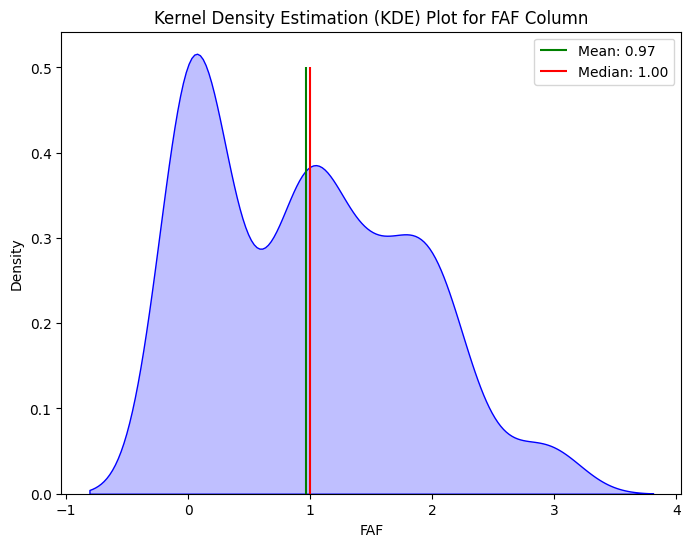

In [316]:
# Create a Kernel Density Estimation (KDE) plot for the 'FAF' column in df_classification_test
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_classification_test['FAF'], fill=True, color='blue')

# Get the mean and median
mean_value_test = df_classification_test['FAF'].mean()
median_value_test = df_classification_test['FAF'].median()

# Add vertical lines for mean and median values in the 'FAF' column
plt.vlines(df_classification_test['FAF'].mean(), ymin=0, ymax=0.5, color='g', label=f'Mean: {mean_value_test:.2f}')
plt.vlines(df_classification_test['FAF'].median(), ymin=0, ymax=0.5, color='r',label=f'Median: {median_value_test:.2f}')

# Set plot title and axis labels
plt.title('Kernel Density Estimation (KDE) Plot for FAF Column')
plt.xlabel('FAF')
plt.ylabel('Density')

# Display the legend
plt.legend()

# Show the plot
plt.show()

The KDE plot shows a slightly skewed distribution,therefore replacing the missing values with the median for the column Frequency of Physical Activities per Week (FAF)

In [317]:
# Calculate the mean of the 'FAF' column in the DataFrame df_classification_test
median_FAF = df_classification_test['FAF'].median()

In [318]:
# Fill missing values in the 'FAF' column with the calculated mean
df_classification_test['FAF'].fillna(median_FAF, inplace=True)

In [319]:
# Display the 'FAF' column after filling missing values with the mean
df_classification_test['FAF']

0      1.144076
1      0.000000
2      1.504003
3      1.536555
4      1.465931
         ...   
312    1.000000
313    2.206055
314    1.000000
315    0.000000
316    1.704640
Name: FAF, Length: 317, dtype: float64

In [320]:
# Display the count of unique values in the 'FAF' column of the Test dataset
df_classification_test['FAF'].value_counts()

FAF
0.000000    73
1.000000    49
2.000000    21
3.000000     7
0.371508     1
            ..
1.097905     1
1.269169     1
1.562213     1
0.743005     1
1.704640     1
Name: count, Length: 171, dtype: int64

#### Time Spent on Technological Devices Column

##### Train

In [321]:
# Display the count of unique values in the 'TUE' column
X['TUE'].value_counts()

TUE
0.000000    421
1.000000    227
2.000000     82
1.119877      3
0.630866      3
           ... 
0.001518      1
0.258472      1
0.311436      1
0.936480      1
0.449886      1
Name: count, Length: 878, dtype: int64

In [322]:
# Display the count of unique values in the 'TUE' column
X['TUE'].isna().sum()

172

In [323]:
# Find and display the minimum value in the 'TUE' column of the feature set X
X['TUE'].min()

0.0

In [324]:
# Find and display the maximum value in the 'TUE' column
X['TUE'].max()

2.0

There are 172 null values in the TUE column of the train dataset. To check the appropriate imputation statistics, we plot the KDE.

c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


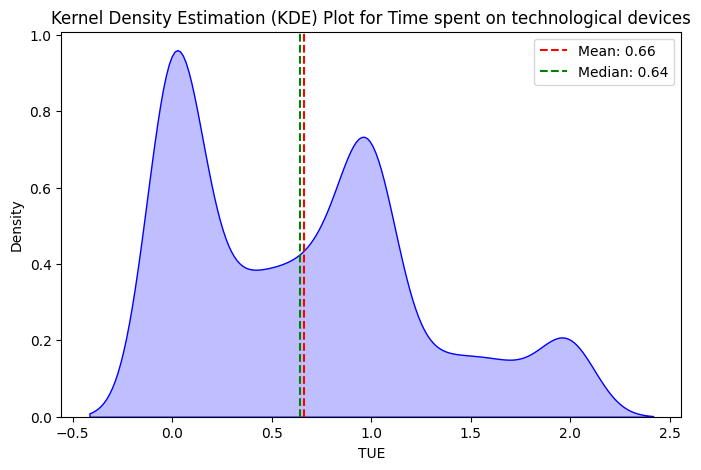

In [325]:
# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Create a Kernel Density Estimation (KDE) plot for the 'Time spent on technological devices' column ('TUE')
sns.kdeplot(X['TUE'], fill=True, color="blue")

# Calculate and retrieve the mean and median values for the 'TUE' column
mean_value = X['TUE'].mean()
median_value = X['TUE'].median()

# Display vertical lines on the plot to indicate the mean and median values
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='--', label=f'Median: {median_value:.2f}')

# Set labels, title, and display a legend on the plot
plt.title('Kernel Density Estimation (KDE) Plot for Time spent on technological devices')
plt.legend()

# Show the final KDE plot with mean and median lines
plt.show()

The KDE plot shows a slightly skewed distribution,therefore replacing the missing values with the median for the column Time Spent on Technological Devices(TUE)

In [326]:
# Fill missing values in the 'TUE' column with the mean value of the column
X['TUE'].fillna(X['TUE'].median(), inplace=True)

In [327]:
#Checking the updated value count of the column 'TUE'
X['TUE'].value_counts()

TUE
0.000000    421
1.000000    227
0.639728    172
2.000000     82
0.002600      3
           ... 
0.001518      1
0.258472      1
0.311436      1
0.936480      1
0.449886      1
Name: count, Length: 879, dtype: int64

##### Test

In [328]:
# Display the count of unique values in the 'TUE' column of the DataFrame df_classification_test
df_classification_test['TUE'].value_counts()

TUE
0.000000    81
1.000000    37
2.000000    20
0.997400     2
0.625350     2
            ..
0.854050     1
1.595306     1
0.839862     1
0.484165     1
0.655571     1
Name: count, Length: 164, dtype: int64

In [329]:
# Checking the null values in the 'TUE' column of the DataFrame df_classification_test
df_classification_test['TUE'].isna().sum()

16

In [330]:
# Calculate and retrieve the mean value for the 'TUE' column
mean_value = df_classification_test['TUE'].mean()
mean_value

0.6590210664451828

In [331]:
# Calculate and retrieve the  median values for the 'TUE' column
median_value = df_classification_test['TUE'].median()
median_value

0.616045

There are 16 null values in the TUE column of the test dataset. To check the appropriate imputation statistics, we plot the KDE.

c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Christinme\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


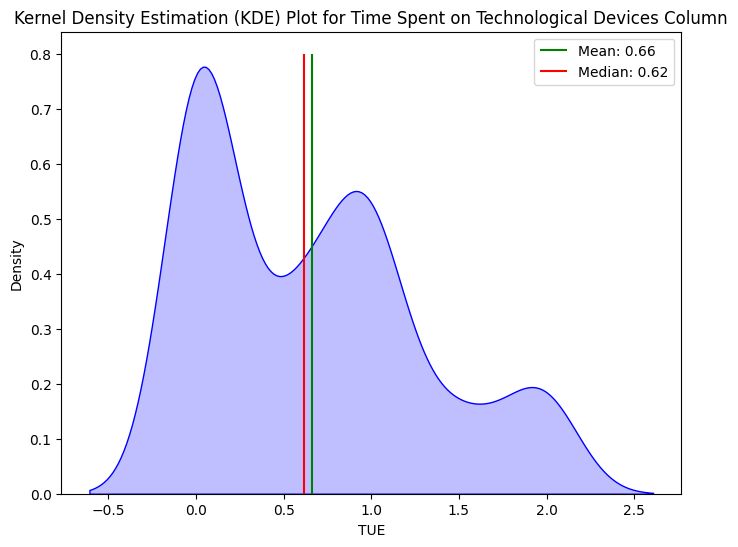

In [332]:
# Create a Kernel Density Estimation (KDE) plot for the 'TUE' column in df_classification_test
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_classification_test['TUE'], fill=True, color='blue')

# Calculate and retrieve the mean and median values for the 'TUE' column
mean_value = df_classification_test['TUE'].mean()
median_value = df_classification_test['TUE'].median()

# Add vertical lines for mean and median values in the 'TUE' column
plt.vlines(df_classification_test['TUE'].mean(), ymin=0, ymax=0.8, color='g', label=f'Mean: {mean_value:.2f}')
plt.vlines(df_classification_test['TUE'].median(), ymin=0, ymax=0.8, color='r', label=f'Median: {median_value:.2f}')

# Set plot title and axis labels
plt.title('Kernel Density Estimation (KDE) Plot for Time Spent on Technological Devices Column')
plt.xlabel('TUE')
plt.ylabel('Density')

# Show legend
plt.legend()

# Show the plot
plt.show()

The KDE plot shows a slightly skewed distribution, replace missing values with the median for the column Time Spent on Technological Devices 'TUE' Column

In [333]:
# Calculate the median value of the 'TUE' column
median_weight = df_classification_test['TUE'].median()

# Fill missing values in the 'TUE' column with the calculated mean
df_classification_test['TUE'].fillna(median_weight, inplace=True)

In [334]:
# Display the 'TUE' column after filling missing values with the median
df_classification_test['TUE']

0      0.173232
1      1.000000
2      0.370067
3      0.625350
4      0.627886
         ...   
312    1.331527
313    1.958089
314    1.003011
315    0.618087
316    0.655571
Name: TUE, Length: 317, dtype: float64

#### Frequency of Alcohol Consumption Column

##### Train

In [335]:
# Display the count of unique values in the 'CALC' column
X['CALC'].value_counts()

CALC
Sometimes     1044
no             486
Frequently      53
Always           1
Name: count, dtype: int64

In [336]:
# Checking the null values in the 'CALC' column
X['CALC'].isna().sum()

#210 null values

210

In [337]:
# Fill missing values in the 'CALC' column with the mode (most frequent value)
X['CALC'].fillna(X['CALC'].mode()[0], inplace=True)

# Display the count of unique values in the 'CALC' column after handling missing values
X['CALC'].value_counts()

CALC
Sometimes     1254
no             486
Frequently      53
Always           1
Name: count, dtype: int64

Mapping the 'CALC' column to numerical values where we have assigned 'no' = 0, 'Sometimes' = '1', 'frequently' = 2 and 'Always' = 3

In [338]:
# Map the 'CALC' column to numerical values using the np.where function where we have assigned 'no' = 0, 'Sometimes' = '1', 'frequenty' = 2 and 'Always' = 3
X['CALC'] = np.where(X['CALC'] == 'no', 0, np.where(X['CALC'] == 'Sometimes', 1, np.where(X['CALC'] == 'Frequently', 2, 3)))

In [339]:
# Display the count of unique values in the updated 'CALC' column
X['CALC'].value_counts()

CALC
1    1254
0     486
2      53
3       1
Name: count, dtype: int64

##### Test

In [340]:
# Display the count of unique values in the 'CALC' column for the DataFrame df_classification_test
df_classification_test['CALC'].value_counts()

CALC
Sometimes     192
no             94
Frequently      8
Name: count, dtype: int64

In [341]:
# Checking the null values in the 'CALC' column
df_classification_test['CALC'].isna().sum()

#23 null values

23

In [342]:
# Find the mode (most frequent value) of the 'CALC' column in df_classification_test
CALC = df_classification_test['CALC'].mode()[0]

# Fill missing values in the 'CALC' column with the calculated mode
df_classification_test['CALC'].fillna(CALC, inplace=True)

# Display the count of unique values in the updated 'CALC' column
df_classification_test['CALC'].value_counts()

CALC
Sometimes     215
no             94
Frequently      8
Name: count, dtype: int64

Converting the 'CALC' column in df_classification_test into binary values, where 'Sometimes' is represented as 1 and other values as 0. The subsequent line provides a count of unique values in the updated 'CALC' column.

In [343]:
# Map the 'CALC' column to numerical values using the np.where function
df_classification_test['CALC'] = np.where(df_classification_test['CALC'] == 'no', 0, np.where(df_classification_test['CALC'] == 'Sometimes', 1, 2))

In [344]:
# Display the count of unique values in the updated 'CALC' column
df_classification_test['CALC'].value_counts()

CALC
1    215
0     94
2      8
Name: count, dtype: int64

#### Mode of Transportation Column

##### Train

In [345]:
# Display the count of unique values in the 'MTRANS' column
X['MTRANS'].value_counts()

#183 null values

MTRANS
Public_Transportation    1203
Automobile                346
Walking                    49
Bike                        7
Motorbike                   6
Name: count, dtype: int64

In [346]:
# Display the null values in the 'MTRANS' column
X['MTRANS'].isna().sum()

183

In [347]:
# Fill missing values in the 'MTRANS' column with the mode (most frequent value)
X['MTRANS'].fillna(X['MTRANS'].mode()[0], inplace=True)

In [348]:
# Display the count of unique values in the updated 'MTRANS' column
X['MTRANS'].value_counts()

MTRANS
Public_Transportation    1386
Automobile                346
Walking                    49
Bike                        7
Motorbike                   6
Name: count, dtype: int64

We opt to change the MTRANS variable to a new binary column 'Active' representing the level of activity undertaken during transportation. For this column, 'Walking' is considered as being active while other mode of transportation are considered as Not Active. Since 'Walking' is less dominant compared to other means of transportation, it is assigned value '0' in the new 'Active' column while the other means are assigned 1.

In [349]:
# Create a new binary column 'Active' based on the condition that 'MTRANS' is equal to 'Walking'
X['Active'] = np.where(X['MTRANS'] == 'Walking', 0, 1)

In [350]:
# Drop the 'MTRANS' column from the feature set X
X.drop(columns=['MTRANS'], inplace=True)

##### Test

In [351]:
# Display the count of unique values in the 'MTRANS' column of the test dataset
df_classification_test['MTRANS'].value_counts()

MTRANS
Public_Transportation    229
Automobile                65
Walking                    3
Motorbike                  2
Name: count, dtype: int64

In [352]:
# Display the null values in the 'MTRANS' column
df_classification_test['MTRANS'].isna().sum()

18

In [353]:
# Fill missing values in the 'MTRANS' column with the mode (most frequent value)
df_classification_test['MTRANS'].fillna(df_classification_test['MTRANS'].mode()[0], inplace=True)

Repeat same transformation as in train dataset

In [354]:
# Create a new binary column 'Active' based on the 'MTRANS' column
df_classification_test['Active'] = np.where(df_classification_test['MTRANS'] == 'Walking', 0, 1)

In [355]:
# Display the updated count of unique values in the 'Active' column of the test dataset
df_classification_test['Active'].value_counts()

Active
1    314
0      3
Name: count, dtype: int64

In [356]:
# Drop the 'MTRANS' column from the DataFrame df_classification_test
df_classification_test.drop(columns=['MTRANS'], inplace=True)

#### Cleaning complete

The final output after all the manipulation done while data cleaning in the train dataset.

In [357]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1794 non-null   int64  
 1   Age                             1794 non-null   float64
 2   Height                          1794 non-null   float64
 3   Weight                          1794 non-null   float64
 4   family_history_with_overweight  1794 non-null   int64  
 5   FAVC                            1794 non-null   int64  
 6   FCVC                            1794 non-null   float64
 7   NCP                             1794 non-null   float64
 8   CAEC                            1794 non-null   int32  
 9   SMOKE                           1794 non-null   int64  
 10  CH2O                            1794 non-null   float64
 11  SCC                             1794 non-null   int64  
 12  FAF                             17

The final output after all the manipulation done while data cleaning in the test dataset.

In [358]:
#Checking the final datatype of the test data frame 
df_classification_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          317 non-null    int64  
 1   Age                             317 non-null    float64
 2   Height                          317 non-null    float64
 3   Weight                          317 non-null    float64
 4   family_history_with_overweight  317 non-null    int64  
 5   FAVC                            317 non-null    int64  
 6   FCVC                            317 non-null    float64
 7   NCP                             317 non-null    float64
 8   CAEC                            317 non-null    int64  
 9   SMOKE                           317 non-null    int64  
 10  CH2O                            317 non-null    float64
 11  SCC                             317 non-null    int64  
 12  FAF                             317 

#### Data Scaling

In [359]:
# Import the StandardScaler module from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

#### Scaling the Training Dataset


In [360]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the feature data for the Training set
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#### Scaling the Test Dataset

In [361]:
# Fit and transform the feature data for the Test set
df_classification_test_scaled = scaler.transform(df_classification_test)
df_classification_test_scaled = pd.DataFrame(df_classification_test_scaled, columns=df_classification_test.columns)

### Clustering

In [362]:
#Importing the Libraries 

# Import the AgglomerativeClustering algorithm from sklearn.cluster
from sklearn.cluster import AgglomerativeClustering

#Importing to visualize a dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Importing KMeans from the sklearn clustering module
from sklearn.cluster import KMeans

# Importing silhouette_score from the sklearn metrics module
from sklearn.metrics import silhouette_score

# Importing pyplot from the matplotlib library
import matplotlib.pyplot as plt


#### Agglomerarive Clustering

We first applied the silhoutte score method to check the optimal number of cluster required.

In [363]:
# Initialize an empty list to store silhouette scores for different cluster numbers
silhouette_scores = []
n_clus_agg = []

# Iterate over a range of cluster numbers (from 2 to 30)
for k in range(2, 30):
    # Create a KMeans clustering model with k clusters
    agg_cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')
    
    # Fit the model to the scaled training data
    agg_cluster.fit(X_scaled)
    
    # Assign cluster labels to the data points
    labels = agg_cluster.labels_
    
    # Calculate the silhouette score for the current clustering
    score = silhouette_score(X_scaled, labels)
    
    # Append the silhouette score to the list
    silhouette_scores.append(score)
    n_clus_agg.append(k)


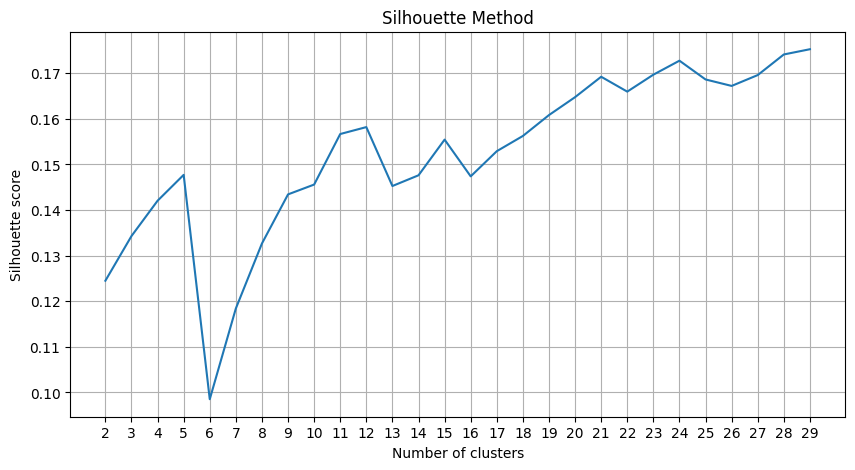

In [364]:

# Plot the silhouette scores to determine the optimal number of clusters
plt.subplots(figsize = (10,5))
plt.plot(range(2, 30), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.xticks(n_clus_agg)
plt.grid()
plt.show()

From the plot, we choose to stay with 5 clusters which gave a relatively high silhoutte score and can be explored. Higher number of clusters, eg 25 clusters, though having higher silhoutte scores would be more difficult to explore and understand.

In [365]:
# Create an instance of AgglomerativeClustering with specified parameters
clustmodel = AgglomerativeClustering(n_clusters=5, linkage='ward') 

# Train the clustering model using the scaled training data (X_scaled)
clustmodel = clustmodel.fit(X_scaled)

In [366]:
# Access the number of clusters determined by the clustering model
clustmodel.n_clusters_

5

Creating the hierarchical clustering dendrogram using Ward's method on the scaled feature set. The dendrogram visualizes the relationships and potential clusters within the data.

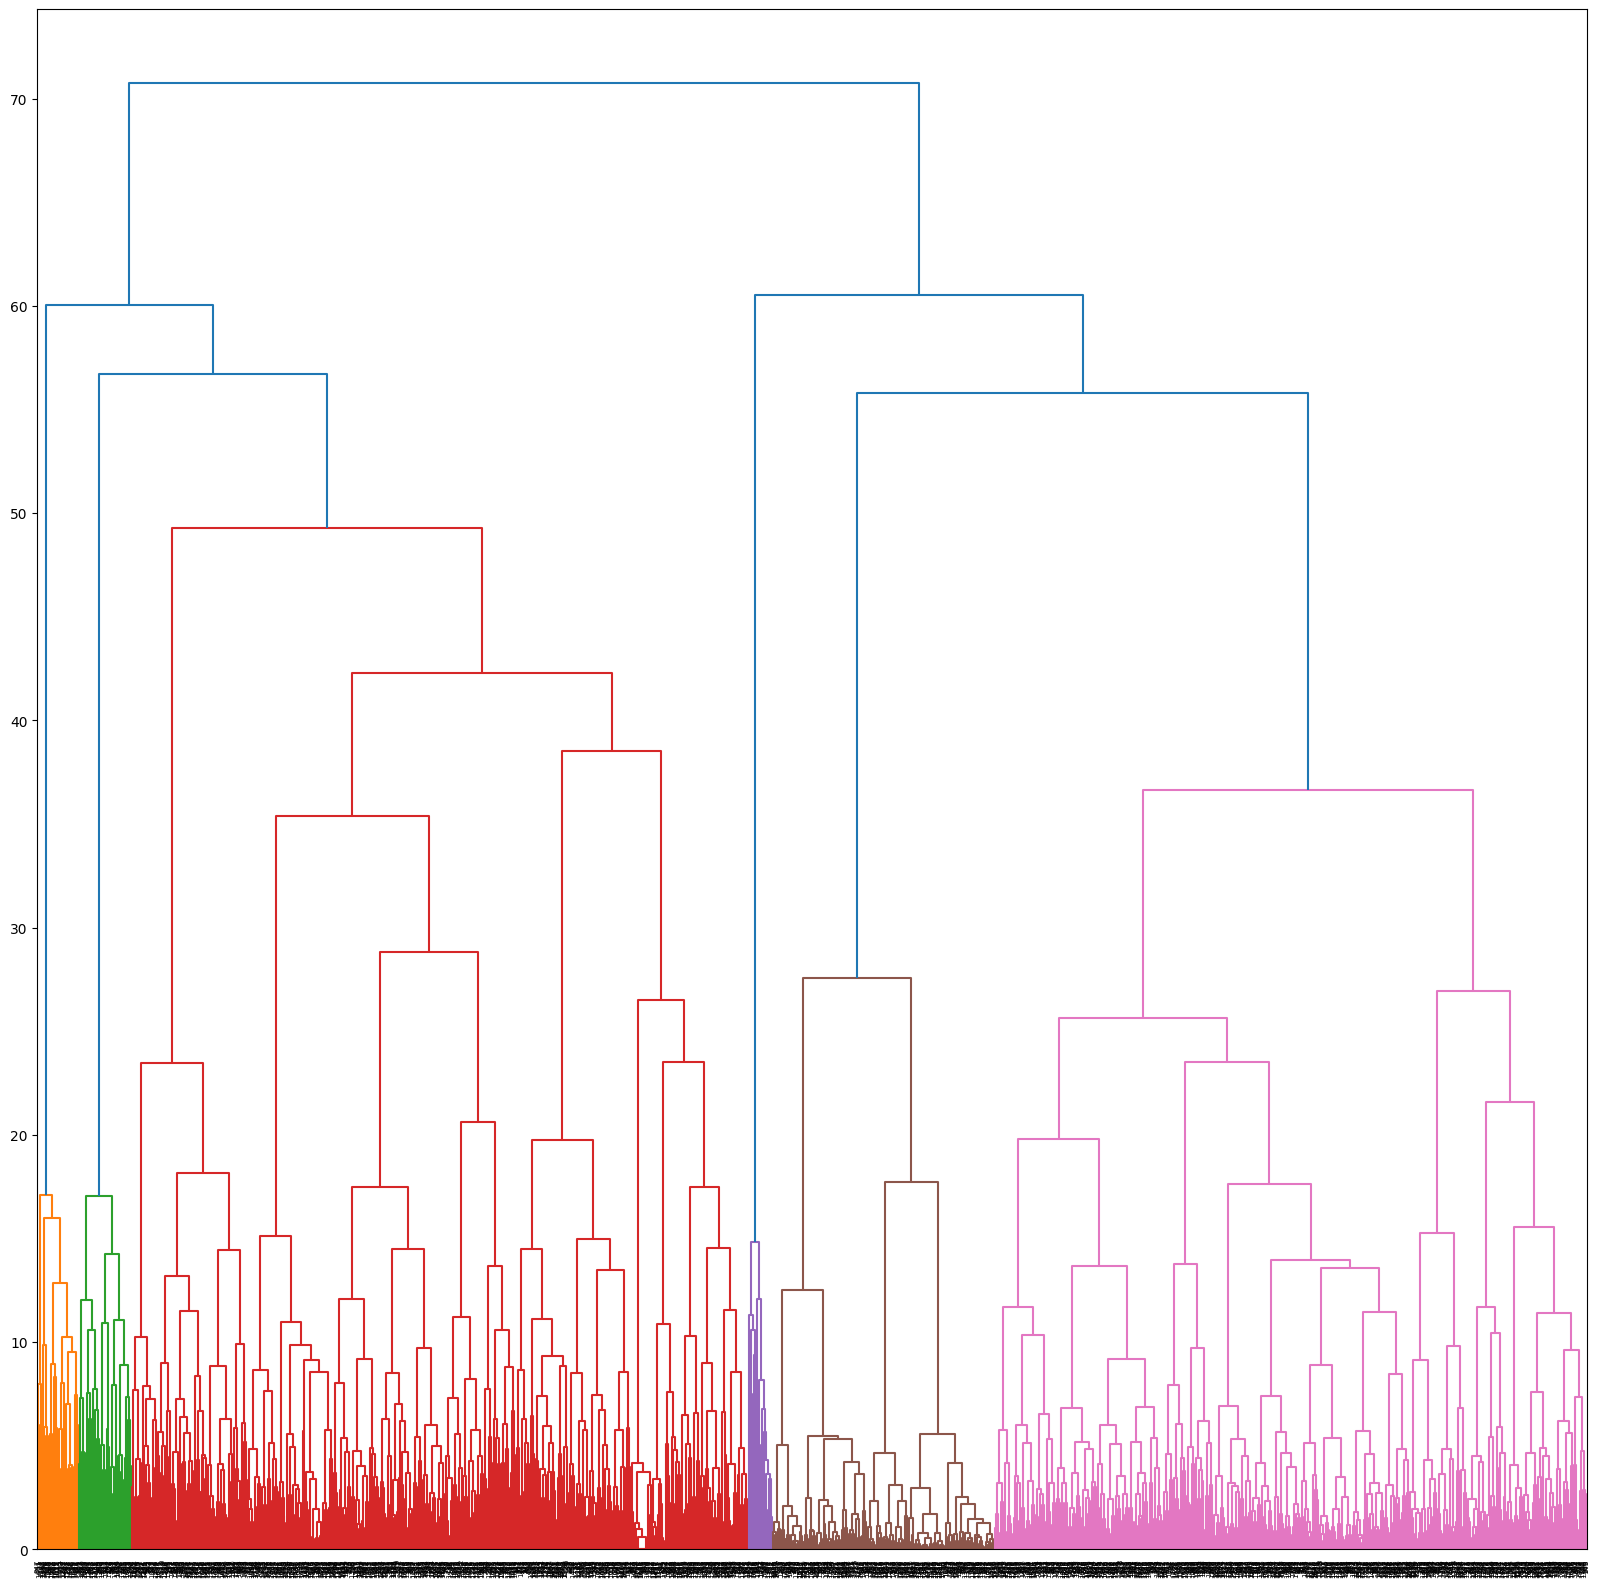

In [367]:
# Perform hierarchical clustering using Ward's method and create a dendrogram
# The linkage matrix is calculated using the scaled feature set X_train_scaled

# Set the size of the figure for better visualization
plt.subplots(figsize=(20, 20))

# Create a dendrogram using the linkage matrix calculated with Ward's method
dendrogram(linkage(X_scaled, method='ward'))

# Add a horizontal line at y = 1.5 for visualizing potential clusters
#plt.axhline(y=1.5, c='r', linestyle='--')

# Display the dendrogram plot
plt.show()

##### Exploring the clusters

In [368]:
# Define the number of data in each cluster

clu = []
clu_num = []

for i in range(clustmodel.n_clusters_):
    # Number of data in each cluster.
    clu_size = clustmodel.labels_[clustmodel.labels_ == i].size
    clu.append(i)
    clu_num.append(clu_size)
    
# create clu_num_dict
clu_num_dict = {clu[i]: clu_num[i] for i in range(len(clu))}
clu_num_dict

{0: 943, 1: 714, 2: 28, 3: 48, 4: 61}

In [369]:
# Attach cluster label to X
# to thoroughly explore the contents of each cluster

X_train_cluster = X.copy()
X_train_cluster['Clusters'] = clustmodel.labels_

In [370]:
#Checking the addition of a new column named Clusters
X_train_cluster

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Active,Clusters
0,1,18.000000,1.790000,52.000000,0,0,3.000000,3.000000,1,1,2.000000,1,1.000000,1.000000,1,1,1
1,1,17.000000,1.700000,70.000000,1,1,3.000000,3.000000,1,1,2.000000,1,0.000000,2.000000,1,0,3
2,1,17.000000,1.790000,57.000000,1,1,2.000000,4.000000,2,1,2.000000,1,2.000000,1.000000,0,1,1
3,1,24.829290,1.755967,112.256165,1,1,1.369529,3.000000,1,1,2.000000,1,1.596576,0.002600,1,1,0
4,1,25.000000,1.780000,83.000000,1,1,2.000000,3.000000,1,1,3.000000,1,3.000000,2.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,1,19.671876,1.699474,78.000000,1,0,1.925064,2.358298,1,1,2.774043,1,0.000000,0.133566,0,1,1
1790,1,30.554956,1.779136,120.600940,1,1,2.671238,3.000000,1,1,2.145368,1,0.882709,0.593917,1,1,0
1791,1,21.000000,1.620000,70.000000,0,1,2.000000,1.000000,0,1,3.000000,1,1.000000,0.000000,1,1,1
1792,0,29.320380,1.642506,69.906708,1,1,2.366949,3.000000,1,1,1.926577,1,1.581242,0.000000,1,1,1


Explore the Instances of the Cluster 

In [371]:
# extract cluster 0
X_train_cluster_0 = X_train_cluster[X_train_cluster['Clusters'] == 0]

# extract cluster 1
X_train_cluster_1 = X_train_cluster[X_train_cluster['Clusters'] == 1]

# extract cluster 2
X_train_cluster_2 = X_train_cluster[X_train_cluster['Clusters'] == 2]

# extract cluster 3
X_train_cluster_3 = X_train_cluster[X_train_cluster['Clusters'] == 3]

# extract cluster 4
X_train_cluster_4 = X_train_cluster[X_train_cluster['Clusters'] == 4]

Gender Column

In [372]:
#Instances in the Column Gender in Cluster 0
X_train_cluster_0['Gender'].value_counts()

Gender
1    675
0    268
Name: count, dtype: int64

In [373]:
#Instances in the Column Gender in Cluster 1
X_train_cluster_1['Gender'].value_counts()

Gender
0    530
1    184
Name: count, dtype: int64

In [374]:
#Instances in the Column Gender in Cluster 2
X_train_cluster_2['Gender'].value_counts()

Gender
1    21
0     7
Name: count, dtype: int64

In [375]:
#Instances in the Column Gender in Cluster 3
X_train_cluster_3['Gender'].value_counts()

Gender
1    30
0    18
Name: count, dtype: int64

In [376]:
#Instances in the Column Gender in Cluster 4
X_train_cluster_4['Gender'].value_counts()

Gender
0    42
1    19
Name: count, dtype: int64

All the clusters includes both the instaces of Male and Female. Cluster 1 have more number of Males while cluster 2 have more number of Females.

Active Column

In [377]:
#Counting the number of active people in different clusters
# yes: 0, no: 1
X_train_cluster[X_train_cluster['Active'] == 0]['Clusters'].value_counts()

Clusters
3    48
2     1
Name: count, dtype: int64

All (except 1) of the active people - those who choose walking as their mode of transportation - are grouped in cluster 3 which only contain 48 instances. It would be interesting to see some properties of these set of people. We check their mean age, weight and height.

In [378]:
# Mean age
X_train_cluster[X_train_cluster['Clusters'] == 3]['Age'].mean()

22.182801833333333

In [379]:
# Mean weight
X_train_cluster[X_train_cluster['Clusters'] == 3]['Weight'].mean()

71.65379279166667

In [380]:
# Mean height
X_train_cluster[X_train_cluster['Clusters'] == 3]['Height'].mean()

1.7163175208333332

Their mean age, weight and height is 22.2, 71.7 and 1.7 repsectively. This is compared to mean age, weight and height of the population which is 24.3, 86.5 and 1.7 respectively. From this, we can suggest that those who like walking are relatively younger and lighter than the rest of the population. 

We also check their frequency of physical activities per week.

In [381]:
X_train_cluster[X_train_cluster['Clusters'] == 3]['FAF'].value_counts()

FAF
2.0    15
1.0    14
0.0    10
3.0     9
Name: count, dtype: int64

Family History with Overweight Column

In [382]:
#Counting the number of Family History with Overweight in different clusters
# yes: 1, no: 0
X_train_cluster[X_train_cluster['family_history_with_overweight'] == 1]['Clusters'].value_counts()

Clusters
0    940
1    470
3     36
4     30
2     26
Name: count, dtype: int64

Family history with overweight appears in all the clusters, with the majority concentrating in Cluster 0 and 1. Cluster 0 and 1 have 943 and 714 instances repsectively. Thus majority (except 3) of the instances in cluster 0 are those with family history with overweight. It was interesting to explore cluster 0 further and we checked the mean weight in this cluster

In [383]:
X_train_cluster[X_train_cluster['Clusters'] == 0]['Weight'].mean()

101.01536914634147

The mean weight is 101 which is much higher than the mean weight of the population (86.5).

We checked the average number of meal per day and average number of snack between meal in this cluster

In [384]:
X_train_cluster[X_train_cluster['Clusters'] == 0]['NCP'].mean()

2.828265592788971

In [385]:
X_train_cluster[X_train_cluster['Clusters'] == 0]['CAEC'].mean()

1.005302226935313

The average number of meal per day for this cluster is slightly higher than that of the population which is 2.7. The average number of snack between meal for this cluster, however, is lower than that of the population which is 1.14.

Smoking Habits 'SMOKE' Column

In [386]:
#Counting the number of Smoking Habits in different clusters
# yes: 0, no: 1
X_train_cluster[X_train_cluster['SMOKE'] == 0]['Clusters'].value_counts()

Clusters
2    28
Name: count, dtype: int64

Those with smoking habit are represented in cluster 2. Cluster 2 have 28 instances in total and all of them smoke. We check their average age and weight.

In [387]:
X_train_cluster[X_train_cluster['Clusters'] == 2]['Age'].mean()

28.683881464285715

In [388]:
X_train_cluster[X_train_cluster['Clusters'] == 2]['Weight'].mean()

95.3104787857143

The average age and weight of those who smoke is 28.68 and 95.31 repsectively. This is compared to mean age and weight of the population which is 24.3 and 86.5 respectively. Those who smoke tend to be older and heavier than the average. 

Having explored the classification dataset a bit which have helped us observe some patterns, we proceed to classification model training.

### Classification Model Training

In [389]:
# Importing necessary libraries for classification tasks using machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [390]:
# split training dataset into train and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [391]:
# Display the shape of the training set (features and target) and the validation set (features and target)
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (1435, 16) (1435,)
Validation set shape: (359, 16) (359,)


In [392]:
# Scale training and validation data

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the feature data for the training set
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# transform the feature data for the validation set
X_val_scaled = scaler.transform(X_val)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)

#### Evaluation metric 

Before going into model training, we first examined our target dataset to determine the appropriate evaluation metric for the model. In other words, we checked if our dataset is balanced or unbalanced. As a recall, we understand that when dealing with a balanced multiclass classification problem, where the number of instances in each class is roughly equal, the accuracy metric is sufficient for model evaluation. 

In such balanced scenarios, the distinctions between macro and micro metrics become less pronounced, as they essentially measure the same performance aspects, resulting in similar scores for precision, recall, F1-score, and other evaluation criteria. However, in imbalanced datasets where class sizes vary significantly, macro averaging can provide a broader perspective by treating each class equally, while micro averaging is more influenced by larger classes.

In [393]:
# checking if dataset is balanced or imbalanced
y.value_counts()

y
Obesity_Type_I         298
Obesity_Type_III       268
Obesity_Type_II        259
Overweight_Level_II    250
Overweight_Level_I     245
Normal_Weight          244
Insufficient_Weight    230
Name: count, dtype: int64

From the value_counts of the target set, we see that the number of instances in each class is close and roughly equal. Hence our dataset is balanced and we can use the accuracy metrics for evaluation. We also see that we have a multiclass classification problem. 

#### Logistic Regression model

In [394]:
# import library
from sklearn.linear_model import LogisticRegression

In [395]:
# instantiate model - multiclass 
lreg = LogisticRegression(multi_class="multinomial", random_state = 0)

# fit model
lreg.fit(X_train_scaled, y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [396]:
# print evaluation metrics on train and validation data
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# Train
print('\n Train')
# accuracy
print('Accuracy score - Train: ', accuracy_score(y_train, lreg.predict(X_train_scaled)))
# recall
print('Recall score (macro) - Train: ', recall_score(y_train, lreg.predict(X_train_scaled), average= 'macro'))
print('Recall score (micro) - Train: ', recall_score(y_train, lreg.predict(X_train_scaled), average= 'micro'))
# precision
print('Precision score (macro) - Train: ', precision_score(y_train, lreg.predict(X_train_scaled), average= 'macro'))
print('Precision score (micro) - Train: ', precision_score(y_train, lreg.predict(X_train_scaled), average= 'micro'))
# f1 score
print('f1 score (macro) - Train: ', f1_score(y_train, lreg.predict(X_train_scaled), average= 'macro'))
print('f1 score (micro) - Train: ', f1_score(y_train, lreg.predict(X_train_scaled), average= 'micro'))


# Valid
print('\n Valid')
# accuracy
print('Accuracy score - Valid: ', accuracy_score(y_val, lreg.predict(X_val_scaled)))
# recall
print('Recall score (macro) - Valid: ', recall_score(y_val, lreg.predict(X_val_scaled), average= 'macro'))
print('Recall score (micro) - Valid: ', recall_score(y_val, lreg.predict(X_val_scaled), average= 'micro'))
# precision
print('Precision score (macro) - Valid: ', precision_score(y_val, lreg.predict(X_val_scaled), average= 'macro'))
print('Precision score (micro) - Valid: ', precision_score(y_val, lreg.predict(X_val_scaled), average= 'micro'))
# f1 score
print('f1 score (macro) - Valid: ', f1_score(y_val, lreg.predict(X_val_scaled), average= 'macro'))
print('f1 score (micro) - Valid: ', f1_score(y_val, lreg.predict(X_val_scaled), average= 'micro'))


 Train
Accuracy score - Train:  0.7937282229965157
Recall score (macro) - Train:  0.7951675022030121
Recall score (micro) - Train:  0.7937282229965157
Precision score (macro) - Train:  0.792391198016931
Precision score (micro) - Train:  0.7937282229965157
f1 score (macro) - Train:  0.7922720105108022
f1 score (micro) - Train:  0.7937282229965157

 Valid
Accuracy score - Valid:  0.7604456824512534
Recall score (macro) - Valid:  0.7424019625593993
Recall score (micro) - Valid:  0.7604456824512534
Precision score (macro) - Valid:  0.7403125851534689
Precision score (micro) - Valid:  0.7604456824512534
f1 score (macro) - Valid:  0.7397974623570692
f1 score (micro) - Valid:  0.7604456824512534


As we see, all the evaluation metrics returned similar values for each of the dataset - train and validation - as our dataset is balanced. We stay with the accuracy score which returns a value of 0.794 and 0.760 for training and validation set respectively.

In [397]:
# Print confusion matrix of training and validation

from sklearn.metrics import confusion_matrix

print('Train confusion matrix: ')
print(confusion_matrix(y_train, lreg.predict(X_train_scaled)))
print('Valid confusion matrix: ')
print(confusion_matrix(y_val, lreg.predict(X_val_scaled)))

Train confusion matrix: 
[[161  12   2   0   0   9   0]
 [ 38 126   7   0   1  21  10]
 [  0   3 184  26   3   5  18]
 [  0   1   3 182   0   8   9]
 [  0   0   0   1 204   0   0]
 [  0  16   7   0   0 144  27]
 [  0   8  30   5   1  25 138]]
Valid confusion matrix: 
[[37  7  1  0  0  1  0]
 [10 23  0  0  0  5  3]
 [ 0  0 40  8  3  3  5]
 [ 0  0  0 54  0  2  0]
 [ 0  0  0  0 63  0  0]
 [ 0  5  2  0  0 31 13]
 [ 0  1 10  2  0  5 25]]


#### Decision Tree Classifer

In [398]:
# instantiate model - no early stopping
dtc = DecisionTreeClassifier()

# fit to X_train_scaled, y_train
dtc.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [399]:
# print accuracy of train and validation dataset
print('Accuracy score - Train: ', accuracy_score(y_train, dtc.predict(X_train_scaled)))
print('Accuracy score - Test: ', accuracy_score(y_val, dtc.predict(X_val_scaled)))

Accuracy score - Train:  1.0
Accuracy score - Test:  0.8746518105849582


The model is in a state of overfitting due to the relatively large difference between training and validation dataset. We proceed with hyperparameter search to find the best model parameters for the decision tree classifier.

In [400]:
# Perform hyperparameter tuning - decision tree classifier

train_score_dtc = []
val_score_dtc = []
index_dtc = []

for max_depth in [2, 4, 6, 8, 10, 15, 20]:   
    dtc_model = DecisionTreeClassifier(max_depth = max_depth, random_state = 0)
    dtc_model.fit(X_train_scaled, y_train)
    train_score_dtc.append(dtc_model.score(X_train_scaled, y_train))
    val_score_dtc.append(dtc_model.score(X_val_scaled, y_val))
    index_dtc.append(max_depth)

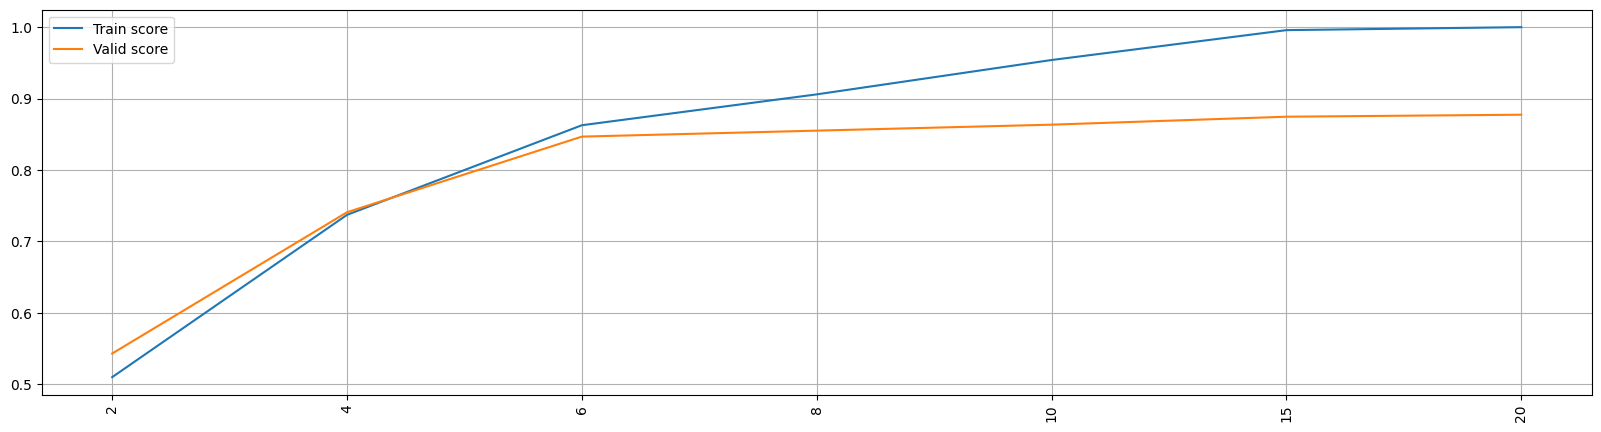

In [401]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index_dtc)), train_score_dtc, label = 'Train score')
plt.plot(range(len(index_dtc)), val_score_dtc, label = 'Valid score')
plt.xticks(range(len(index_dtc)), index_dtc, rotation = 90)
plt.legend()
plt.grid()

Decision tree model with both train and test scores above 0.8 and the smallest generalization gap.

In [402]:
# create dataframe with index, train and valid score

# create dictionary
data = {'max_depth': index_dtc,
        'train_score':train_score_dtc,
        'val_score': val_score_dtc}

# create dataframe
dtc_search = pd.DataFrame(data)

# create new column in dataframe - difference between train and test score
dtc_search['train_val_diff'] = dtc_search['train_score'] - dtc_search['val_score']
dtc_search

,max_depth,train_score,val_score,train_val_diff
0,2,0.510105,0.543175,-0.033071
1,4,0.737282,0.740947,-0.003665
2,6,0.862718,0.846797,0.015921
3,8,0.905923,0.855153,0.050770
4,10,0.954007,0.863510,0.090497
5,15,0.995819,0.874652,0.121167
6,20,1.000000,0.877437,0.122563


In [403]:
# dtc search with train and train score above 0.8
dtc_search_0_8 = dtc_search[(dtc_search['train_score'] > 0.8) & 
(dtc_search['val_score'] > 0.8)]

# dtc_search_o_8 score with smallest generalization gap.
dtc_search_0_8[dtc_search_0_8['train_val_diff'] == min(dtc_search_0_8['train_val_diff'])]

,max_depth,train_score,val_score,train_val_diff
2,6,0.862718,0.846797,0.015921


So, the best max_depth for the Decision Tree Classifier with train and validation score above 0.8 and smallest generalization gap is 6. While max_depth values above 6 produces models with higher train accuracy score, the gap between training and validation data increases suggesting a state of overfitting. The train and validation score for max_depth of 6 is 0.863 and 0.847 respectively.

#### Random Forest Classifer

In [404]:
# instantiate model - no early stopping
rfc = RandomForestClassifier()

# fit to X_train_scaled, y_train
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [405]:
# print accuracy of train and validation dataset
print('Accuracy score - Train: ', accuracy_score(y_train, rfc.predict(X_train_scaled)))
print('Accuracy score - Test: ', accuracy_score(y_val, rfc.predict(X_val_scaled)))

Accuracy score - Train:  1.0
Accuracy score - Test:  0.9164345403899722


The model is in a state of overfitting due to the relatively difference between training and validation dataset. We proceed with hyperparameter search to find the best model parameters for the decision tree classifier.

In [406]:
# Perform hyperparameter tuning - random forest classifier
train_score_rfc = []
val_score_rfc = []
index_rfc = []

for n_estimators in [50, 100, 200, 500]:
    for max_features in [0.1, 0.5, 1.0]:
        for max_samples in [0.1, 0.5, 1.0]:
            for max_depth in [1, 2, 5, 7, 10]:
                rfc = RandomForestClassifier(random_state= 0, 
                                             n_estimators = n_estimators,
                                             max_samples= max_samples, 
                                             max_features= max_features,
                                             max_depth= max_depth)
                rfc.fit(X_train_scaled, y_train)
                train_score_rfc.append(rfc.score(X_train_scaled, y_train))
                val_score_rfc.append(rfc.score(X_val_scaled, y_val))
                index_rfc.append((n_estimators, max_features, 
                              max_samples, max_depth))

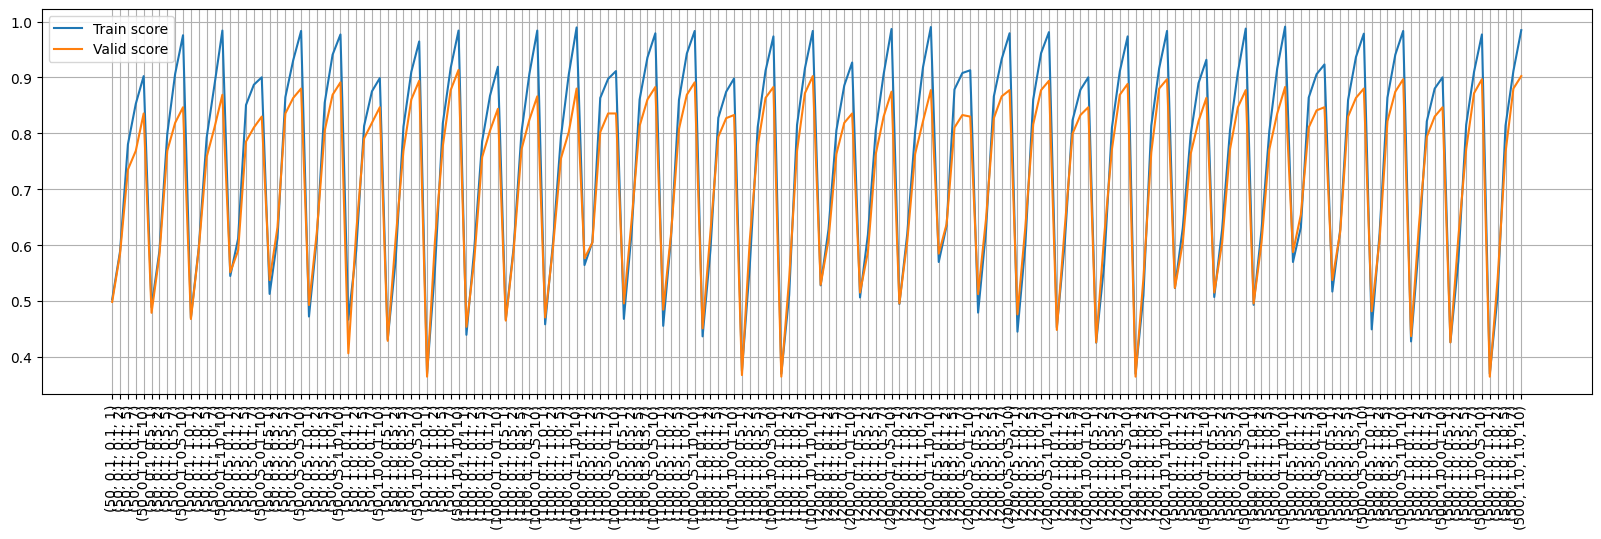

In [407]:
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(range(len(index_rfc)), train_score_rfc, label = 'Train score')
plt.plot(range(len(index_rfc)), val_score_rfc, label = 'Valid score')
plt.xticks(range(len(index_rfc)), index_rfc, rotation = 90)
plt.legend()
plt.grid()

Random Forest Classifier model with both train and test scores above 0.8 and the smallest generalization gap.

In [408]:
# create dataframe with index, train and valid score

# create dictionary
data = {'rfc_param_': index_rfc,
        'train_score':train_score_rfc,
        'val_score': val_score_rfc}

# create dataframe
rfc_search = pd.DataFrame(data)

# create new column in dataframe - difference between train and test score
rfc_search['train_val_diff'] = rfc_search['train_score'] - rfc_search['val_score']
rfc_search

,rfc_param_,train_score,val_score,train_val_diff
0,"(50, 0.1, 0.1, 1)",0.503136,0.498607,0.004529
1,"(50, 0.1, 0.1, 2)",0.588850,0.584958,0.003892
2,"(50, 0.1, 0.1, 5)",0.780488,0.735376,0.045112
3,"(50, 0.1, 0.1, 7)",0.852962,0.768802,0.084159
4,"(50, 0.1, 0.1, 10)",0.902439,0.835655,0.066784
...,...,...,...,...
175,"(500, 1.0, 1.0, 1)",0.370035,0.364903,0.005132
176,"(500, 1.0, 1.0, 2)",0.510105,0.540390,-0.030285
177,"(500, 1.0, 1.0, 5)",0.813937,0.766017,0.047921
178,"(500, 1.0, 1.0, 7)",0.911498,0.880223,0.031275


In [409]:
# dtc search with train and train score above 0.8
rfc_search_0_8 = rfc_search[(rfc_search['train_score'] > 0.8) & 
(rfc_search['val_score'] > 0.8)]

# dtc_search_o_8 score with smallest generalization gap.
rfc_search_0_8[rfc_search_0_8['train_val_diff'] == min(rfc_search_0_8['train_val_diff'])]

,rfc_param_,train_score,val_score,train_val_diff
22,"(50, 0.5, 0.5, 5)",0.864808,0.835655,0.029154


So, the best parameters for the Random Forest Classifier with train and validation score above 0.8 and smallest generalization gap is (n_estimators = 50, max_samples= 0.5, max_features= 0.5, max_depth= 5). This produces a train and validation score of 0.865 and 0.836 respectively.

### Classification Prediction

For the classification prediction, we go with the Random Forest Classifier model that returned high accuracy score on both training and validation set, with small generalization gap. We believe it would perform better on the test data set than the Decision Tree Classifier. The best hyperparameters as n_estimators = 50, max_samples= 0.5, max_features= 0.5, max_depth= 5.

In [410]:
# Train best model
rfc_best = RandomForestClassifier(random_state= 0, 
                                n_estimators = 50,
                                max_samples= 0.5, 
                                max_features= 0.5,
                                max_depth= 5)

# fit to training datset
rfc_best.fit(X_scaled, y)


RandomForestClassifier(max_depth=5, max_features=0.5, max_samples=0.5,
                       n_estimators=50, random_state=0)

In [411]:
# predict test data
y_class_pred = rfc_best.predict(df_classification_test_scaled)

In [412]:
# Get the unique values and their counts
unique_values, counts = np.unique(y_class_pred, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f"{value} occurs {count} times")

Insufficient_Weight occurs 42 times
Normal_Weight occurs 46 times
Obesity_Type_I occurs 56 times
Obesity_Type_II occurs 32 times
Obesity_Type_III occurs 55 times
Overweight_Level_I occurs 36 times
Overweight_Level_II occurs 50 times
